In [1]:
import pandas as pd

In [2]:
scored_cs_xlmr = pd.read_csv(
    "./opensubtitles/cs-en.tok/cs_subspace_qa_output/xlmr_nliv2_5-langs_OpenSubtitles.cs-en.cs.tok.csv")
scored_cs_xlmr.rename(columns={"Action": "cs", "Score": "cs_xlmr_score"}, inplace=True)

scored_cs_robeczech = pd.read_csv(
    "./opensubtitles/cs-en.tok/cs_subspace_qa_output/robeczech-base_nliv2_cs_OpenSubtitles.cs-en.cs.tok.csv")["Score"]
scored_cs_robeczech.rename("cs_robeczech_score", inplace=True)

scored_en_xlmr = pd.read_csv(
    "./opensubtitles/cs-en.tok/en_subspace_qa_output/xlmr_nliv2_5-langs_OpenSubtitles.cs-en.en.tok.csv")
scored_en_xlmr.rename(columns={"Action": "en", "Score": "en_xlmr_score"}, inplace=True)

scored_en_bert = pd.read_csv(
    "./opensubtitles/cs-en.tok/en_subspace_qa_output/bert-base-cased_nliv2_en_OpenSubtitles.cs-en.en.tok.csv")["Score"]
scored_en_bert.rename("en_bert_score", inplace=True)

0           0.121633
1           0.068104
2           0.018740
3           0.583525
4           0.034270
              ...   
42274443    0.461988
42274444   -0.223529
42274445   -0.158931
42274446   -0.209465
42274447    0.128260
Name: en_bert_score, Length: 42274448, dtype: float64

In [3]:
dual_xent_scores = pd.read_csv("./opensubtitles/cs-en.tok/dxent.scores")

In [4]:
assert len(scored_cs_xlmr) == len(scored_en_xlmr) == len(dual_xent_scores) == len(scored_en_bert) == len(scored_cs_robeczech)

In [5]:
data = pd.concat([scored_cs_xlmr, scored_cs_robeczech, scored_en_xlmr, scored_en_bert, dual_xent_scores], axis=1)

In [6]:
data.head()

,cs,cs_xlmr_score,cs_robeczech_score,en,en_xlmr_score,en_bert_score,DualXent
0,Cha Moo - hyuk,0.480682,-0.023290,Cha .. Moo .. hyuk,0.392182,0.121633,0.002015
1,Vydělám hodně peněz a vrátím se do Koreje .,0.249992,0.110706,I 'll make a lot of money . And go to Korea .,0.244992,0.068104,0.072857
2,"Počkej ne mě , mami !",-0.290935,0.056279,"Wait , mother !",0.308269,0.018740,0.000358
3,Zajistím ti lepší život !,0.540875,0.182765,I 'll go and place you in luxury .,0.473671,0.583525,0.000089
4,Bereš lásku jako hru ?,0.275266,0.129012,Is it wrong if you think of love as a game too ?,-0.154418,0.034270,0.003512


In [8]:
import math
data["xlmr_diff"] = abs(data.en_xlmr_score - data.cs_xlmr_score)
data["cs_diff"] = abs(data.cs_robeczech_score - data.cs_xlmr_score)
data["en_diff"] = abs(data.en_bert_score - data.en_xlmr_score)
data["bert_diff"] = abs(data.en_bert_score - data.cs_robeczech_score)
data["log_dual_xent"] = data.DualXent.map(math.log)

In [9]:
data = data.drop_duplicates(['cs','en'], keep='last')
data = data[data.en.map(lambda x: isinstance(x, str))]
data = data[data.cs.map(lambda x: isinstance(x, str))]

In [10]:
data = data[data.en.map(lambda x: "?" not in x)]
data = data[data.cs.map(lambda x: "?" not in x)]

In [12]:
print("XLMR diff")
print(f"Correlation with exp scores: {data.xlmr_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.xlmr_diff.corr(data.log_dual_xent)}")

print("Czech diff")
print(f"Correlation with exp scores: {data.cs_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.cs_diff.corr(data.log_dual_xent)}")

print("English diff")
print(f"Correlation with exp scores: {data.en_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.en_diff.corr(data.log_dual_xent)}")

print("English vs Czech mono")
print(f"Correlation with exp scores: {data.bert_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.bert_diff.corr(data.log_dual_xent)}")

XLMR diff
Correlation with exp scores: -0.11678209172773904
Correlation with lgo scores: -0.21534886598087336
Czech diff
Correlation with exp scores: 0.01108135922214816
Correlation with lgo scores: -0.01779211951738267
English diff
Correlation with exp scores: -0.006802302903642765
Correlation with lgo scores: -0.01725014983374594
English vs Czech mono
Correlation with exp scores: -0.05385519257408703
Correlation with lgo scores: -0.13675838181961167


In [13]:
import matplotlib.pyplot as plt

(array([1.8076672e+07, 6.5041710e+06, 1.6855370e+06, 4.9552600e+05,
        1.4702900e+05, 3.8620000e+04, 8.5520000e+03, 1.4830000e+03,
        1.7300000e+02, 1.8000000e+01]),
 array([6.33258479e-09, 2.12265799e-01, 4.24531592e-01, 6.36797384e-01,
        8.49063177e-01, 1.06132897e+00, 1.27359476e+00, 1.48586055e+00,
        1.69812635e+00, 1.91039214e+00, 2.12265793e+00]),
 <BarContainer object of 10 artists>)

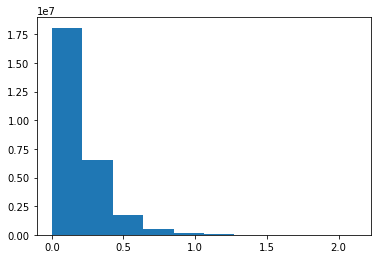

In [14]:
plt.hist(data.xlmr_diff)

(array([1.0000000e+00, 5.0000000e+00, 4.5000000e+01, 4.2300000e+02,
        2.6940000e+03, 2.3539000e+04, 2.5041100e+05, 2.0323060e+06,
        1.0227861e+07, 1.4420496e+07]),
 array([-47.86200232, -43.08955589, -38.31710946, -33.54466303,
        -28.7722166 , -23.99977017, -19.22732374, -14.4548773 ,
         -9.68243087,  -4.90998444,  -0.13753801]),
 <BarContainer object of 10 artists>)

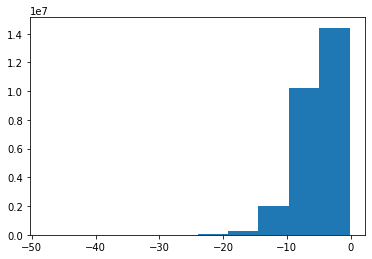

In [15]:
plt.hist(data.log_dual_xent)

(-20.0, 0.0)

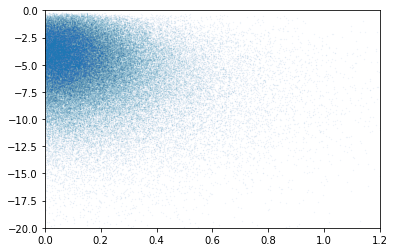

In [16]:
plt.scatter(data.xlmr_diff[:100000], data.log_dual_xent[:100000], alpha=0.1, s=0.1)
plt.xlim((0, 1.2))
plt.ylim((-20, 0))

In [17]:
len(data)

26957781

In [19]:
data = data[data.log_dual_xent > -3]
print("XLMR diff")
print(f"Correlation with exp scores: {data.xlmr_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.xlmr_diff.corr(data.log_dual_xent)}")

print("Czech diff")
print(f"Correlation with exp scores: {data.cs_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.cs_diff.corr(data.log_dual_xent)}")

print("English diff")
print(f"Correlation with exp scores: {data.en_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.en_diff.corr(data.log_dual_xent)}")

print("English vs Czech mono")
print(f"Correlation with exp scores: {data.bert_diff.corr(data.DualXent)}")
print(f"Correlation with lgo scores: {data.bert_diff.corr(data.log_dual_xent)}")

XLMR diff
Correlation with exp scores: -0.061561807736976976
Correlation with lgo scores: -0.0598599902910164
Czech diff
Correlation with exp scores: 0.031315374824444075
Correlation with lgo scores: 0.02678311717227304
English diff
Correlation with exp scores: -0.0059887761770143376
Correlation with lgo scores: -0.0020572965926088423
English vs Czech mono
Correlation with exp scores: 0.007598714350702799
Correlation with lgo scores: 0.0011456804921000227


In [74]:
data.nlargest(200, 'cs_diff').tail(50)[['cs', 'en', 'cs_robeczech_score', 'en_bert_score', 'cs_xlmr_score', 'en_xlmr_score']]

,cs,en,cs_robeczech_score,en_bert_score,cs_xlmr_score,en_xlmr_score
41283729,Ohrožuje vaši budoucnost .,He threatens your future .,-0.878850,-0.703817,0.417145,-0.555736
1278390,- Prase .,- Pig !,-0.467005,-0.166251,0.827059,0.095500
5347595,- Prase .,- Pig .,-0.467005,-0.117566,0.827059,0.167020
5706200,- Prase .,- It 's a pig .,-0.467005,-0.211868,0.827059,-0.137265
15204021,- Prase .,It 's a pig .,-0.467005,-0.195002,0.827059,-0.147790
34168475,- Prase .,Pig .,-0.467005,-0.185071,0.827059,0.196082
32661222,- Prase .,- A pig .,-0.467005,-0.139951,0.827059,-0.044843
21549562,Ublížíte mu .,You 're going to hurt him .,-0.710721,-0.940021,0.583339,-0.650017
11823033,Now I ' m tryin ' to forget you,Now I 'm tryin ' to forget you,0.611472,-0.009146,-0.681934,-0.603969
34073924,Mám vyřídit upřímnou soustrast .,He said to send his condolences .,0.800487,0.395386,-0.492486,0.517065


In [48]:
data['xlmr_diff'].mean()

0.15290460234786993

(array([1.00000e+00, 7.00000e+00, 5.00000e+00, 8.00000e+00, 8.00000e+00,
        8.00000e+00, 1.10000e+01, 1.80000e+01, 2.10000e+01, 4.40000e+01,
        4.50000e+01, 7.70000e+01, 8.80000e+01, 1.40000e+02, 1.68000e+02,
        2.27000e+02, 3.45000e+02, 3.75000e+02, 5.08000e+02, 6.81000e+02,
        9.29000e+02, 1.17100e+03, 1.44900e+03, 1.83600e+03, 2.42200e+03,
        2.94600e+03, 3.58700e+03, 4.47400e+03, 5.56000e+03, 6.83500e+03,
        8.47300e+03, 1.04580e+04, 1.31170e+04, 1.67130e+04, 2.24730e+04,
        2.98460e+04, 3.99170e+04, 5.53710e+04, 7.59250e+04, 1.04195e+05,
        1.42746e+05, 1.93456e+05, 2.57082e+05, 3.34011e+05, 4.18046e+05,
        4.99244e+05, 5.61152e+05, 5.87194e+05, 5.77779e+05, 5.39631e+05,
        4.85587e+05, 4.23511e+05, 3.58331e+05, 2.96557e+05, 2.39724e+05,
        1.90678e+05, 1.48476e+05, 1.15270e+05, 8.86690e+04, 6.78440e+04,
        5.19320e+04, 4.02540e+04, 3.16150e+04, 2.48800e+04, 1.98930e+04,
        1.53830e+04, 1.20310e+04, 9.56800e+03, 7.42

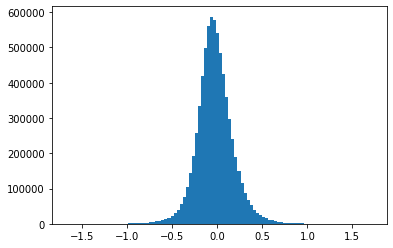

In [49]:
plt.hist(data.en_xlmr_score - data.cs_xlmr_score, bins=100)

In [ ]:
data.to_csv("scored-en-cs.csv")

In [ ]:
import scipy.stats
#scipy.stats.ttest_rel(data.de_gbert_score, data.de_xlmr_score)
scipy.stats.ttest_rel(data.en_bert_score[1:], data.de_gbert_score[:-1]).pvalue